# **Ridge Regression for Olympics medals prediction dataset**

# **About the Dataset**

The aim here is to predict the number of medals won by each team participating in the olympics. To perform this prediction there are 8 independent columns for which we use to predict the total number of medals won by each country

# **Dataset Description**

**Independent variables**

1) team : Teams representing the country

2) year : year in which the olympics is being held

3) athletes : Total number of athletes representing the team

4) events :  Total number of events participated by the teams

5) age : Average age of the athletes participating in each country

6) weight : Average weight of the athletes participating in each country

7) height : Average height of the athletes participating in each country

8) prev_medals : previous number of medals won by each country prior to the year

**Target**

9) medal : The total number of medals won by that country that particular year

In [133]:
#importing the libraries
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [134]:
#Reading the dataset
df = pd.read_csv("/content/drive/MyDrive/Datasets/teams (1).csv")
df.shape

(2014, 9)

In [135]:
df.head()

,team,year,athletes,events,age,height,weight,prev_medals,medals
0,AFG,1964,8,8,22.0,161.0,64.2,0.0,0
1,AFG,1968,5,5,23.2,170.2,70.0,0.0,0
2,AFG,1972,8,8,29.0,168.3,63.8,0.0,0
3,AFG,1980,11,11,23.6,168.4,63.2,0.0,0
4,AFG,2004,5,5,18.6,170.8,64.8,0.0,0


In [136]:
#Here we are creating 3 different lists for segregating features between categorical,Numerical and also the features required for calculating Outliers
CategoricalFeatures = [feature for feature in df.columns if df[feature].dtypes =='O']
NumericalFeatures = [feature for feature in df.columns if feature not in CategoricalFeatures+['year']]
OutlierFeatures = [feature for feature in df.columns if feature not in CategoricalFeatures+['year']+['medals']]

print("Categorical features is=======>",CategoricalFeatures)
print("Numerical features is=======>",NumericalFeatures)
print("Outlier features is=======>",OutlierFeatures)

Categorical features is=======> ['team']
Numerical features is=======> ['athletes', 'events', 'age', 'height', 'weight', 'prev_medals', 'medals']
Outlier features is=======> ['athletes', 'events', 'age', 'height', 'weight', 'prev_medals']


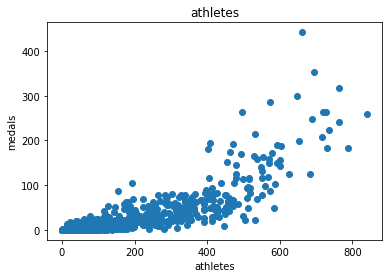

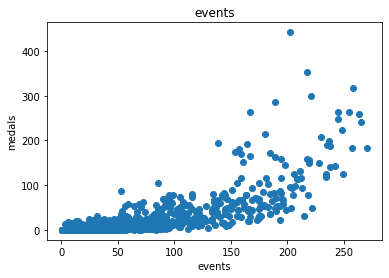

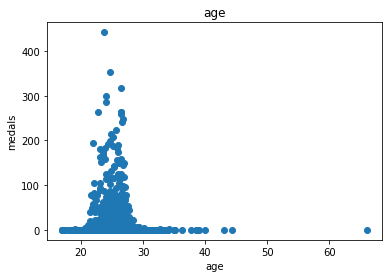

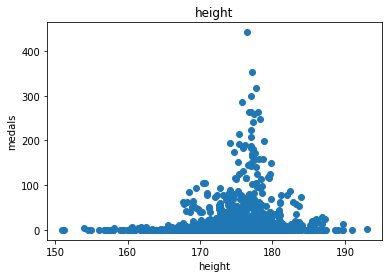

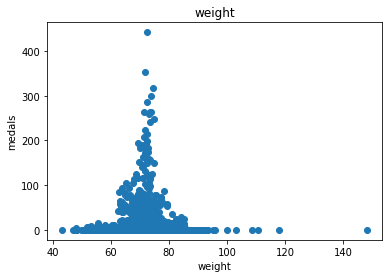

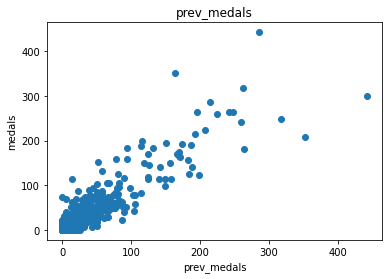

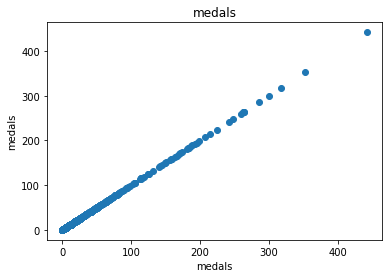

In [137]:
#Plotting a scatter plot for all the Numerical variables
for feature in NumericalFeatures:
  data=df.copy()
  plt.scatter(data[feature],data['medals'])
  plt.xlabel(feature)
  plt.ylabel('medals')
  plt.title(feature)
  plt.show()

In [138]:
"""
plt.scatter(df['year'],df['medals'])
plt.xlabel('year')
plt.ylabel('medals')
plt.title('year vs medals')
plt.show()"""

"\nplt.scatter(df['year'],df['medals'])\nplt.xlabel('year')\nplt.ylabel('medals')\nplt.title('year vs medals')\nplt.show()"

Here in the below to bar charts we are trying to figure out the difference in previous medals and current year won by that country according to that country

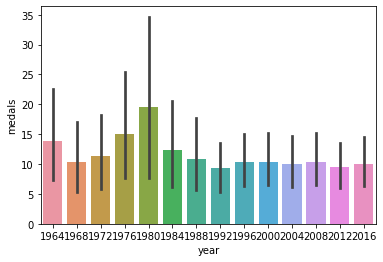

In [139]:
sns.barplot(x = df['year'],y = df['medals'],data = df)
plt.show()

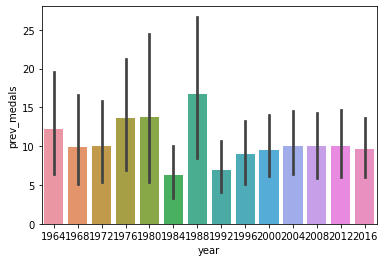

In [140]:
sns.barplot(x = df['year'],y = df['prev_medals'],data = df)
plt.show()

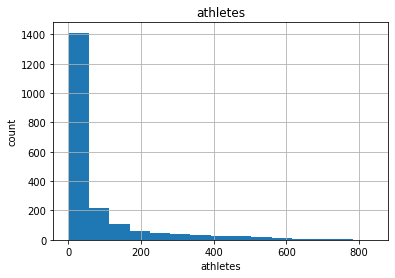

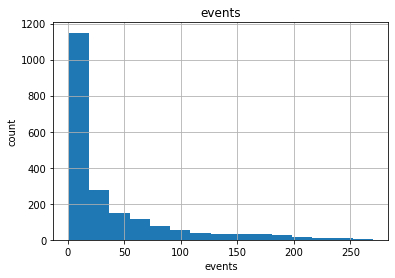

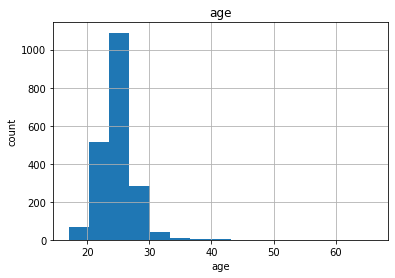

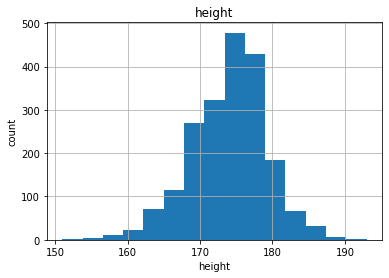

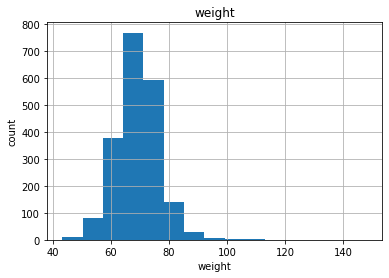

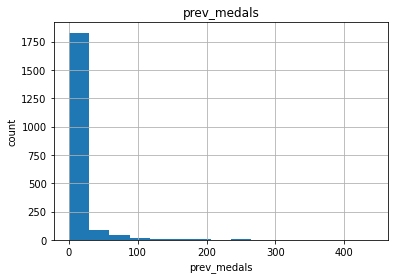

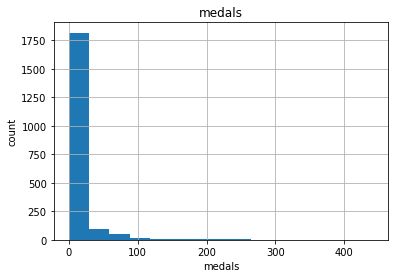

In [141]:
#Plotting the histogram plots the Numerical variables
for feature in NumericalFeatures:
  data=df.copy()
  data[feature].hist(bins = 15)
  plt.xlabel(feature)
  plt.ylabel('count')
  plt.title(feature)
  plt.show()



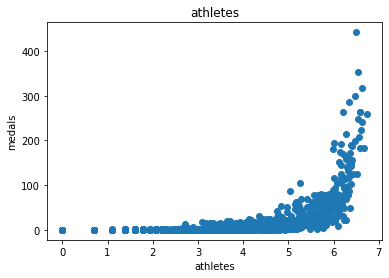

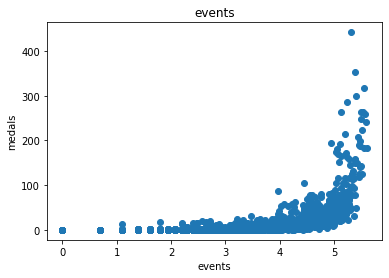

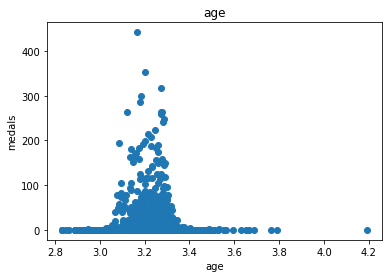

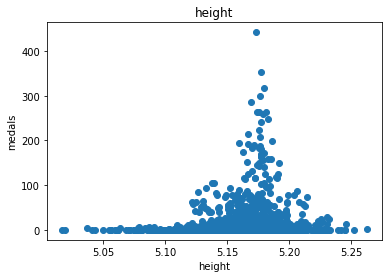

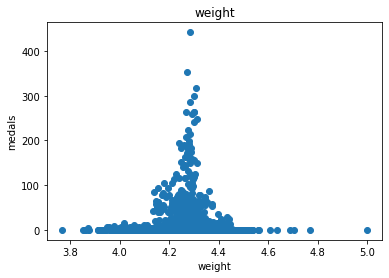

In [142]:
#Applying log transformation as the data was highly skewed and plotting the scatter plot again
for feature in NumericalFeatures:
  data=df.copy()
  if 0 not in data[feature].unique():
    data[feature]=np.log(data[feature])
    plt.scatter(data[feature],data['medals'])
    plt.xlabel(feature)
    plt.ylabel('medals')
    plt.title(feature)
    plt.show()

In [143]:
data.head(15)

,team,year,athletes,events,age,height,weight,prev_medals,medals
0,AFG,1964,8,8,22.0,161.0,64.2,0.0,0
1,AFG,1968,5,5,23.2,170.2,70.0,0.0,0
2,AFG,1972,8,8,29.0,168.3,63.8,0.0,0
3,AFG,1980,11,11,23.6,168.4,63.2,0.0,0
4,AFG,2004,5,5,18.6,170.8,64.8,0.0,0
5,AFG,2008,4,4,22.5,179.2,62.8,0.0,1
6,AFG,2012,6,6,24.8,171.7,60.8,1.0,1
7,AFG,2016,3,3,24.7,173.7,74.0,1.0,0
8,AHO,1964,4,4,28.5,171.2,69.4,0.0,0
9,AHO,1968,5,4,31.0,173.2,67.8,0.0,0


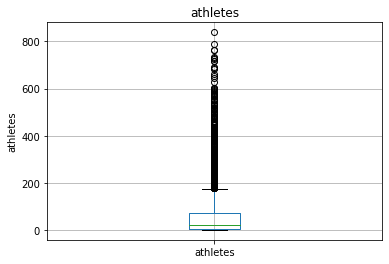

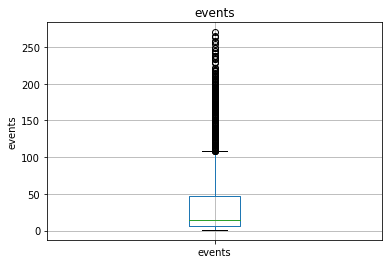

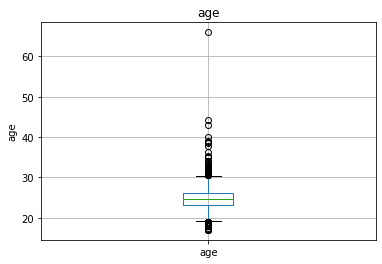

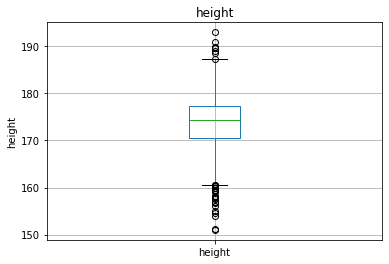

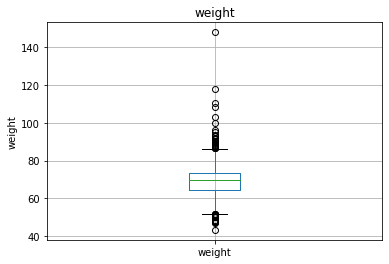

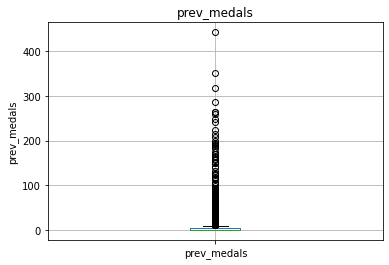

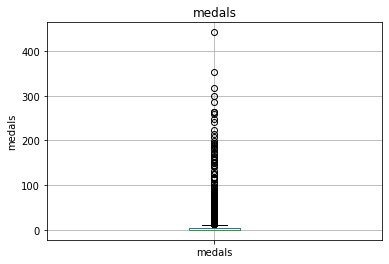

In [144]:
#Plotting the box plot for detecting the outliers
for feature in NumericalFeatures:
  dataOutliers=data.copy()
  dataOutliers[feature]=dataOutliers[feature]
  dataOutliers.boxplot(column = feature)
  plt.ylabel(feature)
  plt.title(feature)
  plt.show()

In [145]:
print(OutlierFeatures)

['athletes', 'events', 'age', 'height', 'weight', 'prev_medals']


In [146]:
#Function for calculating the outliers and storing the index of all the rows associated with it
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    ls = df.index[(df[ft]<lower_limit) | (df[ft]>upper_limit)]

    return ls

In [147]:
index_list = []
for features in OutlierFeatures:
    index_list.extend(outliers(data, features))

In [148]:
index_list

[71,
 73,
 76,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 227,
 228,
 229,
 230,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 265,
 266,
 278,
 279,
 280,
 281,
 282,
 283,
 284,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 370,
 371,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 464,
 465,
 466,
 467,
 468,
 469,
 470,
 471,
 570,
 571,
 572,
 573,
 574,
 575,
 576,
 577,
 578,
 579,
 623,
 624,
 625,
 626,
 627,
 628,
 629,
 630,
 631,
 632,
 633,
 634,
 635,
 636,
 637,
 638,
 639,
 640,
 661,
 662,
 663,
 664,
 665,
 666,
 667,
 668,
 669,
 670,
 671,
 672,
 673,
 674,
 680,
 681,
 682,
 683,
 697,
 698,
 699,
 700,
 701,
 702,
 703,
 704,
 725,
 727,
 814,
 815,
 816,
 817,
 818,
 819,
 820,
 821,
 822,
 823,
 824,
 825,
 826,
 932,
 933,
 934,
 935,
 936,
 937,
 938,
 939,
 940,
 941,
 942,
 943,
 944,
 945,
 977,
 978,
 979,
 980,
 981,
 982,
 983,
 984,
 985,
 986,
 987,
 988,
 989,
 1015,
 1019,
 1020,
 1021,
 1

In [149]:
#Function for removing the indexes of all the rows containing outlier index
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [150]:
df2 = remove(data, index_list)

In [151]:
df2.shape

(1486, 9)

In [152]:
df.head(10)

,team,year,athletes,events,age,height,weight,prev_medals,medals
0,AFG,1964,8,8,22.0,161.0,64.2,0.0,0
1,AFG,1968,5,5,23.2,170.2,70.0,0.0,0
2,AFG,1972,8,8,29.0,168.3,63.8,0.0,0
3,AFG,1980,11,11,23.6,168.4,63.2,0.0,0
4,AFG,2004,5,5,18.6,170.8,64.8,0.0,0
5,AFG,2008,4,4,22.5,179.2,62.8,0.0,1
6,AFG,2012,6,6,24.8,171.7,60.8,1.0,1
7,AFG,2016,3,3,24.7,173.7,74.0,1.0,0
8,AHO,1964,4,4,28.5,171.2,69.4,0.0,0
9,AHO,1968,5,4,31.0,173.2,67.8,0.0,0


In [153]:
df2.head(50)

,team,year,athletes,events,age,height,weight,prev_medals,medals
0,AFG,1964,8,8,22.0,161.0,64.2,0.0,0
1,AFG,1968,5,5,23.2,170.2,70.0,0.0,0
2,AFG,1972,8,8,29.0,168.3,63.8,0.0,0
3,AFG,1980,11,11,23.6,168.4,63.2,0.0,0
5,AFG,2008,4,4,22.5,179.2,62.8,0.0,1
6,AFG,2012,6,6,24.8,171.7,60.8,1.0,1
7,AFG,2016,3,3,24.7,173.7,74.0,1.0,0
8,AHO,1964,4,4,28.5,171.2,69.4,0.0,0
11,AHO,1976,4,4,27.3,174.5,66.0,0.0,0
14,AHO,1992,4,4,30.2,178.0,83.5,1.0,0


In [154]:
df2['medals'].value_counts()

0     1017
1      154
2       74
3       54
5       33
6       27
4       26
7       19
8       17
10      10
13       7
14       6
9        6
11       6
12       4
15       4
17       3
18       3
16       3
23       3
22       3
21       2
20       2
35       1
24       1
31       1
Name: medals, dtype: int64

In [155]:
df2.isna().sum()

team           0
year           0
athletes       0
events         0
age            0
height         0
weight         0
prev_medals    0
medals         0
dtype: int64

In [156]:
print(df2.dtypes)

team            object
year             int64
athletes         int64
events           int64
age            float64
height         float64
weight         float64
prev_medals    float64
medals           int64
dtype: object


In [157]:
df2.duplicated().sum()

0

In [158]:
grps = pd.unique(df2.team.values)

In [159]:
grps

array(['AFG', 'AHO', 'ALB', 'ALG', 'AND', 'ANG', 'ANT', 'ARG', 'ARM',
       'ARU', 'ASA', 'AUT', 'AZE', 'BAH', 'BAN', 'BAR', 'BDI', 'BEL',
       'BEN', 'BER', 'BHU', 'BIH', 'BIZ', 'BOL', 'BOT', 'BRA', 'BRN',
       'BRU', 'BUL', 'BUR', 'CAF', 'CAM', 'CAY', 'CGO', 'CHA', 'CHI',
       'CIV', 'CMR', 'COD', 'COK', 'COL', 'COM', 'CPV', 'CRC', 'CRO',
       'CUB', 'CYP', 'CZE', 'DEN', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY',
       'ERI', 'ESA', 'ESP', 'EST', 'ETH', 'FIJ', 'FIN', 'FSM', 'GAB',
       'GAM', 'GBS', 'GEO', 'GEQ', 'GHA', 'GRE', 'GRN', 'GUA', 'GUI',
       'GUM', 'GUY', 'HAI', 'HKG', 'HON', 'INA', 'IND', 'IOA', 'IRI',
       'IRL', 'IRQ', 'ISL', 'ISR', 'ISV', 'IVB', 'JAM', 'JOR', 'KAZ',
       'KEN', 'KGZ', 'KIR', 'KOR', 'KSA', 'KUW', 'LAO', 'LAT', 'LBA',
       'LBR', 'LCA', 'LES', 'LIB', 'LIE', 'LTU', 'LUX', 'MAD', 'MAR',
       'MAS', 'MAW', 'MDA', 'MDV', 'MEX', 'MGL', 'MHL', 'MKD', 'MLI',
       'MLT', 'MNE', 'MON', 'MOZ', 'MRI', 'MTN', 'MYA', 'NAM', 'NCA',
       'NED', 'NEP',

In [160]:
#Here we are grouping countries according to the medals won by them each year
d_data = {grp:df2['medals'][df2.team == grp] for grp in grps}

In [161]:
d_data

{'AFG': 0    0
 1    0
 2    0
 3    0
 5    1
 6    1
 7    0
 Name: medals, dtype: int64, 'AHO': 8     0
 11    0
 14    0
 15    0
 18    0
 Name: medals, dtype: int64, 'ALB': 19    0
 21    0
 22    0
 23    0
 24    0
 Name: medals, dtype: int64, 'ALG': 25    0
 26    0
 27    0
 28    2
 29    0
 30    2
 31    3
 32    5
 33    0
 34    2
 35    1
 36    2
 Name: medals, dtype: int64, 'AND': 39    0
 40    0
 41    0
 43    0
 44    0
 46    0
 Name: medals, dtype: int64, 'ANG': 47    0
 48    0
 49    0
 50    0
 51    0
 52    0
 53    0
 54    0
 Name: medals, dtype: int64, 'ANT': 55    0
 56    0
 57    0
 58    0
 59    0
 60    0
 61    0
 62    0
 63    0
 Name: medals, dtype: int64, 'ARG': 64     1
 65     2
 66     1
 67     0
 68     0
 69    13
 Name: medals, dtype: int64, 'ARM': 77    1
 78    0
 79    6
 80    3
 81    4
 Name: medals, dtype: int64, 'ARU': 82    0
 83    0
 84    0
 85    0
 86    0
 88    0
 Name: medals, dtype: int64, 'ASA': 92    0
 93    0
 94  

In [162]:
df2.describe()

,year,athletes,events,age,height,weight,prev_medals,medals
count,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000
mean,1995.717362,29.995289,19.427995,24.549731,173.637820,68.568708,0.934724,1.431359
std,15.039013,34.577167,19.573118,2.135623,4.876025,6.510308,1.960325,3.506655
min,1964.000000,1.000000,1.000000,19.100000,160.600000,51.800000,0.000000,0.000000
25%,1984.000000,6.000000,6.000000,23.200000,170.200000,64.000000,0.000000,0.000000
50%,2000.000000,15.000000,11.000000,24.600000,174.000000,68.650000,0.000000,0.000000
75%,2008.000000,39.000000,27.000000,26.000000,176.975000,73.000000,1.000000,1.000000
max,2016.000000,175.000000,106.000000,30.200000,187.300000,86.000000,10.000000,35.000000


In [163]:
len(df2.columns)

9

In [164]:
print(df2.head())

  team  year  athletes  events   age  height  weight  prev_medals  medals
0  AFG  1964         8       8  22.0   161.0    64.2          0.0       0
1  AFG  1968         5       5  23.2   170.2    70.0          0.0       0
2  AFG  1972         8       8  29.0   168.3    63.8          0.0       0
3  AFG  1980        11      11  23.6   168.4    63.2          0.0       0
5  AFG  2008         4       4  22.5   179.2    62.8          0.0       1


In [165]:
#calculating the significance value using ANNOVA test 

F, p = stats.f_oneway(d_data['AFG'], d_data['AHO'], d_data['ALB'], d_data['ALG'], d_data['AND'], d_data['ANG'], d_data['ANT'], d_data['ARG'], d_data['ARM'],d_data['ARU'], d_data['ASA'], d_data['AUT'], d_data['AZE'], d_data['BAH'], d_data['BAN'], d_data['BAR'], d_data['BDI'], d_data['BEL'],d_data['BEN'], d_data['BER'], d_data['BHU'], d_data['BIH'], d_data['BIZ'], d_data['BOL'], d_data['BOT'], d_data['BRA'], d_data['BRN'],d_data['BRU'], d_data['BUL'], d_data['BUR'], d_data['CAF'], d_data['CAM'], d_data['CAY'], d_data['CGO'], d_data['CHA'], d_data['CHI'], d_data['CIV'], d_data['CMR'], d_data['COD'], d_data['COK'], d_data['COL'], d_data['COM'], d_data['CPV'], d_data['CRC'], d_data['CRO'],
d_data['CUB'], d_data['CYP'], d_data['CZE'], d_data['DEN'], d_data['DJI'], d_data['DMA'], d_data['DOM'], d_data['ECU'], d_data['EGY'],d_data['ERI'], d_data['ESA'], d_data['ESP'], d_data['EST'], d_data['ETH'], d_data['FIJ'], d_data['FIN'], d_data['FSM'], d_data['GAB'],
d_data['GAM'], d_data['GBS'], d_data['GEO'], d_data['GEQ'], d_data['GHA'], d_data['GRE'], d_data['GRN'], d_data['GUA'], d_data['GUI'],d_data['GUM'], d_data['GUY'], d_data['HAI'], d_data['HKG'], d_data['HON'], d_data['INA'], d_data['IND'], d_data['IOA'], d_data['IRI'],
d_data['IRL'], d_data['IRQ'], d_data['ISL'], d_data['ISR'], d_data['ISV'], d_data['IVB'], d_data['JAM'], d_data['JOR'], d_data['KAZ'],d_data['KEN'], d_data['KGZ'], d_data['KIR'], d_data['KOR'], d_data['KSA'], d_data['KUW'], d_data['LAO'], d_data['LAT'], d_data['LBA'],
d_data['LBR'], d_data['LCA'], d_data['LES'], d_data['LIB'], d_data['LIE'], d_data['LTU'], d_data['LUX'], d_data['MAD'], d_data['MAR'],d_data['MAS'], d_data['MAW'], d_data['MDA'], d_data['MDV'], d_data['MEX'], d_data['MGL'], d_data['MHL'], d_data['MKD'], d_data['MLI'],
d_data['MLT'], d_data['MNE'], d_data['MON'], d_data['MOZ'], d_data['MRI'], d_data['MTN'], d_data['MYA'], d_data['NAM'], d_data['NCA'],d_data['NED'], d_data['NEP'], d_data['NGR'], d_data['NIG'], d_data['NOR'], d_data['NRU'], d_data['NZL'], d_data['OMA'], d_data['PAK'],
d_data['PAN'], d_data['PAR'], d_data['PER'], d_data['PHI'], d_data['PLE'], d_data['PLW'], d_data['PNG'], d_data['POR'], d_data['PRK'],d_data['PUR'], d_data['QAT'], d_data['RSA'], d_data['RWA'], d_data['SAM'], d_data['SEN'], d_data['SEY'], d_data['SGP'], d_data['SKN'],
d_data['SLE'], d_data['SLO'], d_data['SMR'], d_data['SOL'], d_data['SOM'], d_data['SRB'], d_data['SRI'], d_data['STP'], d_data['SUD'],d_data['SUI'], d_data['SUR'], d_data['SVK'], d_data['SWE'], d_data['SWZ'], d_data['SYR'], d_data['TAN'], d_data['TGA'], d_data['THA'],
d_data['TJK'], d_data['TKM'], d_data['TOG'], d_data['TPE'], d_data['TTO'], d_data['TUN'], d_data['TUR'], d_data['TUV'], d_data['UAE'],d_data['UGA'], d_data['URU'], d_data['UZB'], d_data['VAN'], d_data['VEN'], d_data['VIE'], d_data['VIN'], d_data['VNM'], d_data['YAR'],d_data['YEM'], d_data['ZAM'], d_data['ZIM'])

In [166]:
if p < 0.05:
  print("The null hypothesis is rejected")
else:
  print("The null hypothesis is accepted")

The null hypothesis is rejected


In [167]:
df2.corr()

,year,athletes,events,age,height,weight,prev_medals,medals
year,1.000000,-0.146787,-0.070818,0.004581,-0.005886,0.025402,0.050813,0.043277
athletes,-0.146787,1.000000,0.948570,0.146052,0.212709,0.185985,0.606223,0.586072
events,-0.070818,0.948570,1.000000,0.168949,0.190510,0.186676,0.619132,0.530074
age,0.004581,0.146052,0.168949,1.000000,0.147934,0.203077,0.173287,0.116772
height,-0.005886,0.212709,0.190510,0.147934,1.000000,0.731417,0.122799,0.155930
weight,0.025402,0.185985,0.186676,0.203077,0.731417,1.000000,0.110762,0.141181
prev_medals,0.050813,0.606223,0.619132,0.173287,0.122799,0.110762,1.000000,0.575308
medals,0.043277,0.586072,0.530074,0.116772,0.155930,0.141181,0.575308,1.000000


In [168]:
# Checking the correlating value between the Numerical features and target value

NullHypothesis=[]
AlternativeHypothesis=[]
for features in NumericalFeatures:
  if features!='medal':
    correlationValue = df2[features].corr(df2['medals'])
    if correlationValue > 0.5:
      NullHypothesis.append(features)
    else:
      AlternativeHypothesis.append(features)

In [169]:
NullHypothesis

['athletes', 'events', 'prev_medals', 'medals']

In [170]:
AlternativeHypothesis

['age', 'height', 'weight']

In [171]:
selectedFeatured=['athletes','events','prev_medals','medals']
df3=df2[NullHypothesis]
df3

,athletes,events,prev_medals,medals
0,8,8,0.0,0
1,5,5,0.0,0
2,8,8,0.0,0
3,11,11,0.0,0
5,4,4,0.0,1
...,...,...,...,...
2009,26,19,0.0,0
2010,14,11,0.0,3
2011,16,15,3.0,4
2012,9,8,4.0,0


In [172]:
#teamsDummify = pd.get_dummies(df2,columns=['team'])
#teamsDummify

In [173]:
#np.corrcoef(df['age'],df['medals'])[0,1]

In [174]:
#Standardising the columns so that its mean is around 0 and Standard deviation is around 1
df3_mean = df3.mean()
df3_std = df3.std()
df3 = (df3 - df3_mean) / df3_std

In [175]:
X=df3.copy()
X=X.drop(['medals'],axis=1)
Y=df3['medals'].copy()

In [176]:
X.describe()
#X.insert(0,'intercept',1)

,athletes,events,prev_medals
count,1.486000e+03,1.486000e+03,1.486000e+03
mean,3.347106e-17,-1.195395e-17,4.781580e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.385675e-01,-9.414951e-01,-4.768210e-01
25%,-6.939634e-01,-6.860427e-01,-4.768210e-01
50%,-4.336761e-01,-4.305903e-01,-4.768210e-01
75%,2.604236e-01,3.868574e-01,3.329851e-02
max,4.193655e+00,4.423005e+00,4.624374e+00


In [177]:
#Splitting the data into train and test data set
X_train, X_test,Y_train,Y_test = train_test_split(X,Y ,test_size=0.1, random_state=1)

In [178]:
X_train

,athletes,events,prev_medals
332,-0.693963,-0.686043,-0.476821
782,-0.780726,-0.890405,-0.476821
456,-0.520439,-0.430590,-0.476821
1249,-0.665043,-0.634952,-0.476821
1747,-0.780726,-0.839314,-0.476821
...,...,...,...
1011,-0.317993,-0.124047,-0.476821
1237,-0.722884,-0.737133,-0.476821
1507,2.921139,3.043562,-0.476821
336,-0.144468,-0.583862,-0.476821


In [179]:
Y_train

332    -0.408184
782    -0.408184
456    -0.408184
1249   -0.408184
1747   -0.408184
          ...   
1011   -0.408184
1237   -0.408184
1507    0.447332
336    -0.408184
1457   -0.408184
Name: medals, Length: 1337, dtype: float64

In [180]:
X_test

,athletes,events,prev_medals
271,-0.462597,-0.430590,-0.476821
542,-0.115547,-0.634952,-0.476821
129,-0.231230,-0.379500,0.543418
878,0.723157,0.591219,0.033299
1079,-0.722884,-0.737133,-0.476821
...,...,...,...
1852,-0.057705,-0.124047,-0.476821
1718,-0.722884,-0.737133,-0.476821
1661,-0.722884,-0.788224,-0.476821
255,2.140277,1.255396,1.563657


In [181]:
Y_test

271    -0.123012
542    -0.408184
129    -0.408184
878    -0.408184
1079   -0.408184
          ...   
1852   -0.408184
1718   -0.408184
1661   -0.408184
255     0.162160
886    -0.408184
Name: medals, Length: 149, dtype: float64

In [182]:
#class function for Ridge Regression

class RidgeRegression:
  def __init__(self, learningRate):
    self.learningRate = learningRate         #Initialising the learningRate
    

  def fit(self,Xtrain,Ytrain):
    X_train = Xtrain 
    Y_train = Ytrain
    alpha = self.learningRate

    x_mean = X_train.mean()
    x_std = X_train.std()

    X2 = (X_train - x_mean) / x_std
    X2.insert(0,'intercept',1)            #Adding the intercept column

    identity = np.identity(len(X2.columns))
    identity[0,0] = 0                          #setting the first row value of identity matrix to 0 
    penalty1 = identity * alpha

    global res
    res = np.dot(np.dot(np.linalg.inv(np.dot(X2.T, X2) + penalty1), X2.T),Y_train)              #Applying the ridge formula
    return res

  def predict(self,Xtest):
    X_test = Xtest
 
    x_mean = X_test.mean()
    x_std = X_test.std()

    X3 = (X_test - x_mean) / x_std
    X3.insert(0,'intercept',1)

    y_pred = np.dot(X3, res)

    return y_pred
    

In [183]:
ridge = RidgeRegression(learningRate=0.7)

In [184]:
res = ridge.fit(X_train,Y_train)
res

array([-0.00292796,  0.66431152, -0.35550247,  0.3971876 ])

In [185]:
ypred = ridge.predict(X_test)

In [186]:
len(ypred)

149

In [187]:
def rsquare(Ytest,Ypred):
  ss_res = ((Ytest - Ypred) ** 2).sum()
  ss_tot = ((Ytest - Ypred.mean()) ** 2).sum()
  r2 = 1 - (ss_res / ss_tot)
  return r2


In [188]:
def rmse(Ytest,Ypred):
    squared_error = (Ytest - Ypred) ** 2
    mean_squared_error = np.mean(squared_error)
    rmse = np.sqrt(mean_squared_error)
    return rmse

In [189]:
def mae(Ytest,Ypred):
    absolute_error = np.abs(Ytest - Ypred)
    mae = np.mean(absolute_error)
    return mae

In [190]:
print("RMSE------->",rmse(Y_test,ypred))
print("rSquare---->",rsquare(Y_test, ypred))
print("MAE-------->",mae(Y_test, ypred))

RMSE-------> 0.9070263003494737
rSquare----> 0.390413286599815
MAE--------> 0.38225642383311237


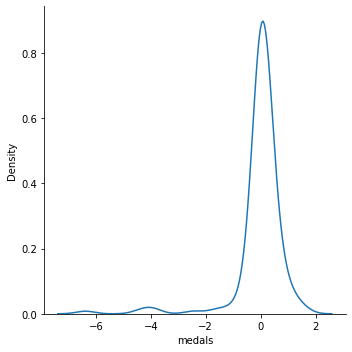

In [191]:
sns.displot(ypred-Y_test,kind='kde')

In [192]:
from sklearn.linear_model import Ridge
RidgeRegressor = Ridge(alpha=0.48)

In [193]:
yfit = RidgeRegressor.fit(X_train,Y_train)
yfit

Ridge(alpha=0.48)

In [194]:
yp = RidgeRegressor.predict(X_test)

In [195]:
print("RMSE------->",rmse(Y_test,yp))
print("rSquare---->",rsquare(Y_test, yp))
print("MAE-------->",mae(Y_test, yp))

RMSE-------> 0.8987526786081022
rSquare----> 0.4013320989498479
MAE--------> 0.3758900013635247


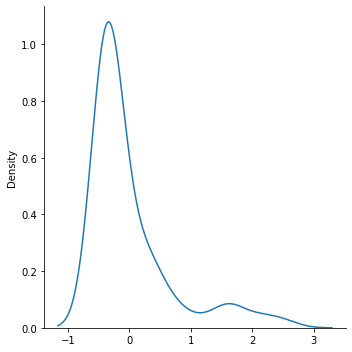

In [196]:
import seaborn as sns
sns.displot(yp,kind='kde')